# **Linear Regression**
Linear regression analysis is used to predict the value of a dependent variable (Y) based on the value of an independent variable (X). The practice of using an input variable to create a prediction categorizes this algorithm as **supervised learning**.

![linear regression](https://365datascience.com/resources/blog/2018-11-image8-4-1024x538.jpg)

# Key Concepts


*   Dependent Variable (Y): The variable we are trying to predict or explain.
*   Independent Variable (X): The variable we are using to make predictions.



## Steps to be taken to achieve linear regression
1. Fit a line to the data using least-squares.
2. Calculate $R^2$.
3. Calculate a p-value to determine significance of $R^2$.

### 1. Fit a line to the data using least-squares
An example is given to predict the prices of a house in Malaysia from the size of the house using Linear Regression. Below is the data table used in the graph.

| Size (sq ft) | Price (MYR) |
|--------------|-------------|
| 800          | 150,000     |
| 1000         | 200,000     |
| 1200         | 240,000     |
| 1500         | 300,000     |
| 1800         | 360,000     |
| 2000         | 400,000     |
| 2200         | 440,000     |
| 2500         | 500,000     |


### Equation of Linear Regression
The equation of a simple linear regression line is as follows:

$Y = b_0 + b_1X$

Where:

$Y$ is the predicted value of the dependent variable.<br>
$X$ is the independent variable.<br>
$b_0$ is the y-intercept.<br>
$b_1$ is the slope of the line (regression coefficient).<br>

To show a visual representation of the given example graph, we will import the necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Then, the data points will be defined as show below:

In [2]:
# Data
sizes = np.array([800, 1000, 1200, 1500, 1800, 2000, 2200, 2500])
prices = np.array([150000, 200000, 240000, 300000, 360000, 400000, 440000, 500000])

Now plotting the data points as scatter plot and then we will find the best fit line using least-squares:

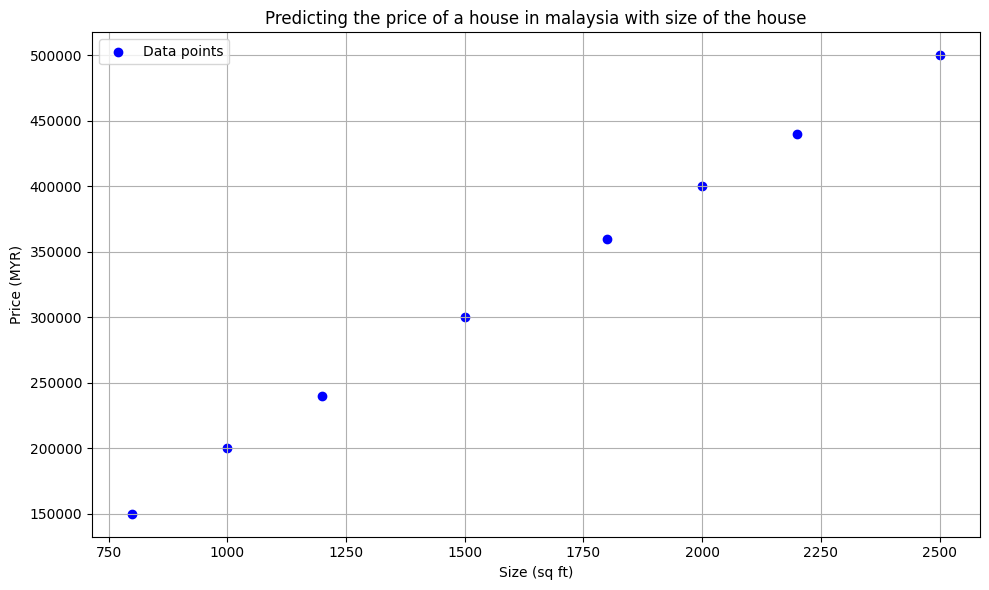

In [3]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(sizes, prices, color='blue', label='Data points')

# Labels and title
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (MYR)')
plt.title('Predicting the price of a house in malaysia with size of the house')
plt.legend()

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()

To find best fit line using least-squares, we draw a line to measure the distance of the data points to the line. Squares the distance of every data point and sum them up.
As shown in the figure below, the distance between the line and the data points is known as residual.

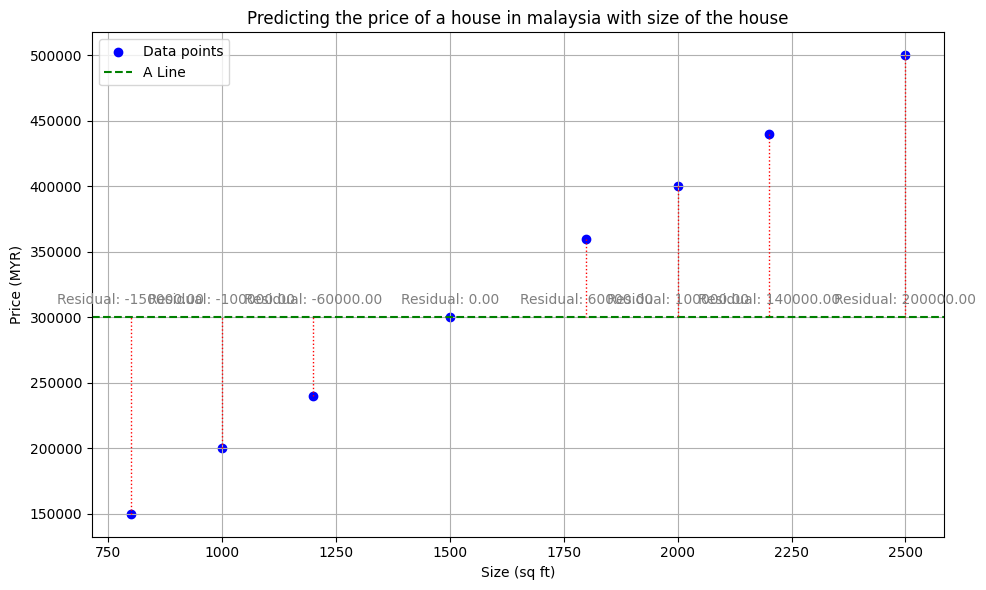

Residuals: [-150000 -100000  -60000       0   60000  100000  140000  200000]


In [4]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of data points
plt.scatter(sizes, prices, color='blue', label='Data points')

# Horizontal line at a higher position
horizontal_line = 300000  # Adjust this value to position the line higher
plt.axhline(y=horizontal_line, color='green', linestyle='--', label=f'A Line')

residuals = prices - horizontal_line

# Plot residuals as dotted lines
for i in range(len(sizes)):
    plt.plot([sizes[i], sizes[i]], [prices[i], horizontal_line], color='red', linestyle=':', linewidth=1)
    plt.text(sizes[i], horizontal_line + 10000, f'Residual: {residuals[i]:.2f}', ha='center', color='gray')

# Labels and title
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (MYR)')
plt.title('Predicting the price of a house in malaysia with size of the house')
plt.legend()

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()


print(f"Residuals: {residuals}")

In [5]:
# sum of squared residuals
ss_res = np.sum(residuals**2)
print("Sum of squared residuals:", ss_res)

Sum of squared residuals: 1925817600


The sum of the squared residuals are noted. The rotation of the line occurs for multiple number of iterations. Writing down iteration, line rotation position and the sum of the squared residuals. The best fit line to the data is the line with the least-squared residuals. An example of a best fit line with the least-squared to the data is shown below in the graph by using the Equation of Linear Regression:

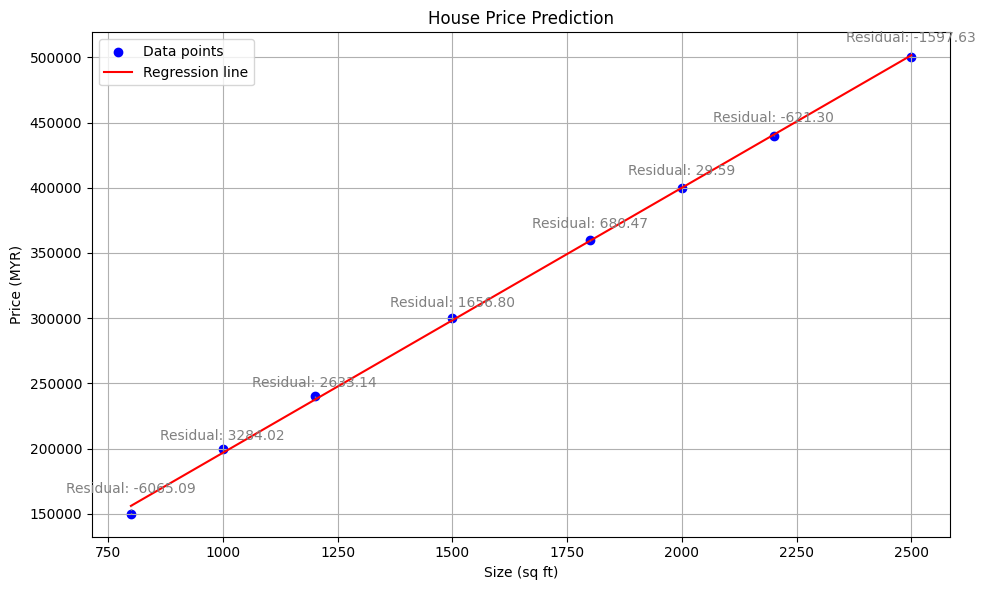

Slope (b1): 203.25443786982248
Intercept (b0): -6538.461538461561
Residuals: [-6065.0887574   3284.02366864  2633.13609467  1656.80473373
   680.47337278    29.58579882  -621.30177515 -1597.63313609]


In [6]:
# Calculate the means of sizes and prices
mean_size = np.mean(sizes)
mean_price = np.mean(prices)

# Calculate the slope (b1) and intercept (b0) for the linear regression line
b1 = np.sum((sizes - mean_size) * (prices - mean_price)) / np.sum((sizes - mean_size)**2)
b0 = mean_price - b1 * mean_size

# Make predictions
predicted_prices = b0 + b1 * sizes

# Calculate residuals
residuals = prices - predicted_prices

# Plot the data, regression line, and residuals
plt.figure(figsize=(10, 6))

# Scatter plot of data points
plt.scatter(sizes, prices, color='blue', label='Data points')

# Best fit line
plt.plot(sizes, predicted_prices, color='red', label='Regression line')

# Plot residuals as lines
for i in range(len(sizes)):
    plt.plot([sizes[i], sizes[i]], [prices[i], predicted_prices[i]], color='gray', linestyle=':', linewidth=1)
    plt.text(sizes[i], predicted_prices[i] + 10000, f'Residual: {residuals[i]:.2f}', ha='center', color='gray')

# Labels and title
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (MYR)')
plt.title('House Price Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print coefficients and residuals
print(f"Slope (b1): {b1}")
print(f"Intercept (b0): {b0}")
print(f"Residuals: {residuals}")

In [7]:
# sum of squared residuals, also known as Sum of Squares around the fit
sr_fit = np.sum(residuals**2)
print("Sum of squared residuals:", sr_fit)
sr_variance = sr_fit/len(sizes)
print("Variance:", sr_variance)

Sum of squared residuals: 60650887.57396431
Variance: 7581360.946745539


Compared to the horizontal line, this line's sum of squared residuals is significantly lesser. In conclusion, the least sum of squared residuals is the best fit of line to the data.

Assuming that the below graph shows the best fit of line with the least sum of squared residuals with a given equation for the line as follows:

In [8]:


# Print slope and intercept
print(f"Slope (m): {b1}")
print(f"Intercept (b): {b0}")

# Equation of the line: y = mx + b
print(f"Equation of the line: y = {b1:.2f}x + {b0:.2f}")

Slope (m): 203.25443786982248
Intercept (b): -6538.461538461561
Equation of the line: y = 203.25x + -6538.46


From the example graph, the equation of the line is $y = 203.25x - 6538.46$. We know that the slope is not equal to zero, which indicates that using the House Size variable will aid in predicting the House Price in Malaysia. To determine the accuracy of that prediction, we must calculate $R^2$.


### 2. Calculate $R^2$
To calculate $R^2$, we get the average value for the variable we want to predict. In this case, we will use House price. From the data above, our average is shown below:


In [9]:
# calculate the average price
def average(data):
    return sum(data) / len(data)

average_price = average(prices)
print("Average price:", average_price)

Average price: 323750.0


Using the average price, we draw a horizontal line from the average point of the graph and measure the distance of the data points and sum them up in square. This variable is called Sum of squares around the mean, which is used to calculate the accuracy of the linear regression model. Sum of Squares around the mean is denoted by SS: $ \text{SS} = \sum_{i=1}^{n} (y_i - \bar{y})^2 \
$.

Where:

*   $y_i$ represents each actual data point.
*   $\bar{y}$ is the mean of the actual data points
*   $n$ is the number of data points.

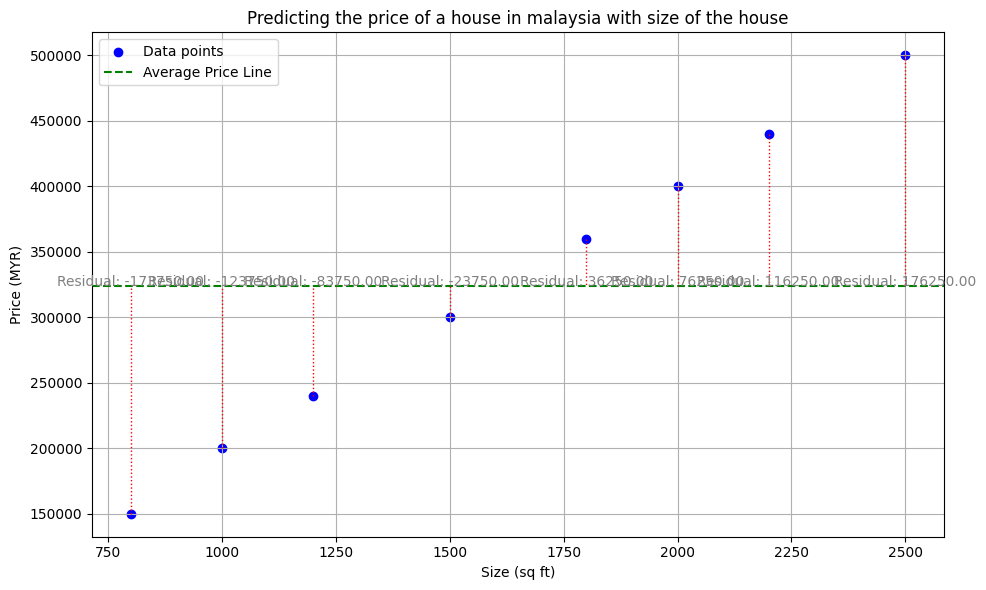

In [10]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of data points
plt.scatter(sizes, prices, color='blue', label='Data points')

# Horizontal line at a higher position
plt.axhline(y=average_price, color='green', linestyle='--', label=f'Average Price Line')

residuals = prices - average_price

# Plot residuals as dotted lines
for i in range(len(sizes)):
    plt.plot([sizes[i], sizes[i]], [prices[i], average_price], color='red', linestyle=':', linewidth=1)
    plt.text(sizes[i], average_price, f'Residual: {residuals[i]:.2f}', ha='center', color='gray')

# Labels and title
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (MYR)')
plt.title('Predicting the price of a house in malaysia with size of the house')
plt.legend()

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()

We know that the distance between the data points and line is known as "residuals". So we can calculate the Sum of Squares around the mean by squaring the residuals by using the example data points given as shown below:

In [11]:
# sum of squares around the mean
ss_mean = np.sum(residuals**2)
print("Sum of squares around the mean:", ss_mean)
ss_variance = ss_mean/len(sizes)
print("Variance:", ss_variance)

Sum of squares around the mean: 104787500000.0
Variance: 13098437500.0


The Sum of Squares around the mean for the example data points is $104,787,500,000$ MYR. After observing $SS$, we calculate the variance around the mean such as:

$Var(SS) = \frac{SS}{n}$, where n is the sample size.

As well as calculating the variance around the least-squared fit:

$Var(SR) = \frac{SR}{n}$, where n is the sample size

To calculate $R^2$, we use the following equation:<br>
$R^2$ = $\frac{Var(SS)-Var(SR)}{Var(SS)}$

We have already determined the values of Sum of Squares around the mean, as well as Sum of Squares around the fit. Calculating the variance we get the following:

$Var(SS)=104,787,500,000/8 = 13098437500$ <br>
$Var(SR)=60650887.57 / 8 = 7581360.94$

$R^2 = (13098437500-7581360.94)/13098437500= 0.99$

In conclusion, the house size explains $99$% of the variation in the house price.

### 3. Calculate the p-value
For the final step, we need to understand the significance of $R^2$. In some cases where there are only two measurements, the resulted $R^2$ will always be $100$% accurate. It is important to determine the significance of $R^2$ by calculating the p-value. <br> <br>
p-value is represented by $F$.<br> <br>
$F = \frac{SS-SR/(P_r-P_s)}{SR/(N-P_r)}$
<br><br>
Where:<br>
$P_r$ is the number of parameters in the fit line (e.g $y=203.25x−6538.46$, so $P_r=2$) <br>
$P_s$ is the number of parameters in the mean line (e.g $y$ point of interception, so $P_s=1$ ). <br>
<br>
We generate multiple random data and calculate the $SS$ and the mean. Then we calculate the fit and $SR$. Then we plug the values inside the formula of $F$. The resulted $F$ value is then plotted into a histogram. And the calculation is repeated multiple times (can be around 100 iterations) and plotting the $F$ value in the histogram. Now, we calculate the $F$ of our given data points and use that F value to check the significance of $R^2$. For instance, $F=6$. then we calculate the p-value by including the numbers that are $>=$ 6 in the histogram and divide it by all the values. The smaller the p-value, the more significant the $R^2$.

# Implementing Linear Regression Using `sklearn`

First we import `LinearRegression` from `sklearn.linear_model`

In [12]:
from sklearn.linear_model import LinearRegression

Using the same dataset, we will create the model and train the model. In sckit-learn, many of the machine learning algorithms expect the independent variable to be a 2d array format, so we will convert the size array in 2d array in order to fit it in the model and train it.

In [13]:
# Create and training the model
sizes = sizes.reshape(-1, 1)
model = LinearRegression()
model.fit(sizes, prices)

LinearRegression()

After the model has been trained, now we create a prediction and display the graph below to compare it with the manual linear regression solution above.

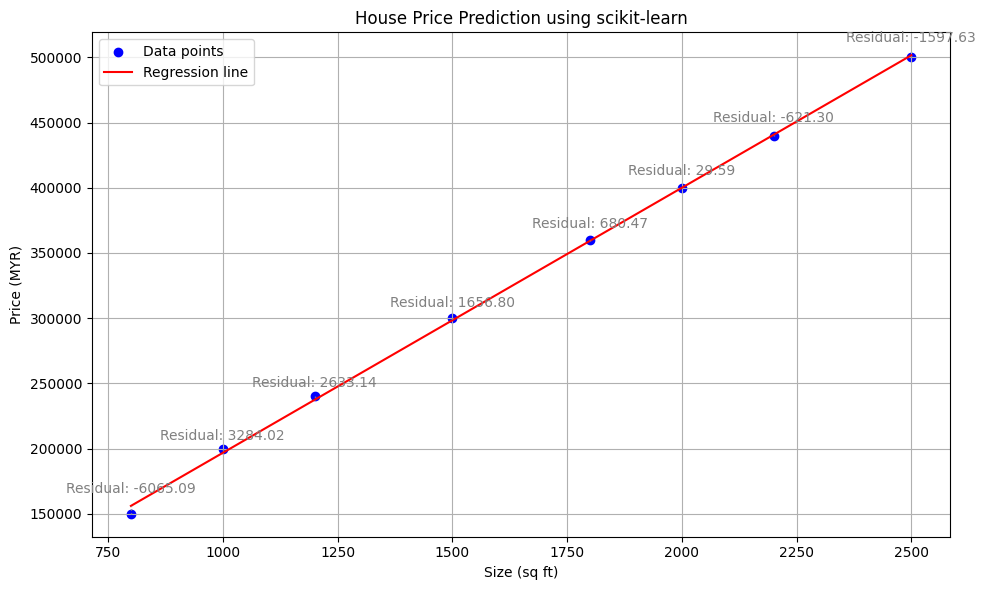

Slope (m): 203.2544378698224
Intercept (b): -6538.461538461386
Equation of the line: y = 203.25x + -6538.46
Residuals: [-6065.0887574   3284.02366864  2633.13609467  1656.80473373
   680.47337278    29.58579882  -621.30177515 -1597.63313609]


In [14]:
# Make predictions
predicted_prices = model.predict(sizes)

# Calculating the residuals
predicted_residuals = prices - predicted_prices


# Plot the data and the regression and residuals line
plt.figure(figsize=(10, 6))
plt.scatter(sizes, prices, color='blue', label='Data points')
plt.plot(sizes, predicted_prices, color='red', label='Regression line')

# Plot residuals as lines
for i in range(len(sizes)):
    plt.plot([sizes[i], sizes[i]], [prices[i], predicted_prices[i]], color='gray', linestyle=':', linewidth=1)
    plt.text(sizes[i], predicted_prices[i] + 10000, f'Residual: {predicted_residuals[i]:.2f}', ha='center', color='gray')

plt.xlabel('Size (sq ft)')
plt.ylabel('Price (MYR)')
plt.title('House Price Prediction using scikit-learn')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print coefficients and residuals
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")
print(f"Equation of the line: y = {slope:.2f}x + {intercept:.2f}")
print(f"Residuals: {predicted_residuals}")

To calculate the coefficient of determination, $R^2$ using the `scikit-learn` library we can use the `score` method. And we calculate the p-value by using `statsmodels.api` library's method:

In [15]:
r_squared = model.score(sizes, prices)
print("R-squared:", r_squared)

R-squared: 0.9994212011206111


In [17]:
import statsmodels.api as sm

sizes_with_intercept = sm.add_constant(sizes)  # Adds a constant term to the predictor
sm_model = sm.OLS(prices, sizes_with_intercept).fit()
p_value = sm_model.pvalues[1]
print("P-value:", p_value)

P-value: 6.060763708462723e-11


# Conclusion
In this exercise, we explored linear regression both manually and using the `scikit-learn` library to predict the house prices based on their size. Both methods yeilds almost the same accuracy and results in terms of prediction, which proves the `scikit-learn` implementatoin is reliable. <br> <br>
In our manual Linear Regression solution, we have calculated the slope and inercept using the formula for linear regression. The best fit line was derived by minimizing the sum of squared residuals. And the approach provides a deep understanding of the underlying mathematics and the functionality of Linear regression. However, some of the limitation of this method is that it require more effort and time to implement.
<br><br>
As for using `scikit-learn` library's Linear Regression, it simplifies the process and it encapsulates and handlles the calculations of the slope and intercept, allowing us to fit a model and make predictions within a few lines of code. This approach is more efficient and less error-prone, especially when dealing with large datasets or complex models.
